In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

from imblearn.over_sampling import RandomOverSampler

#FeatureEngineering
#!pip install lightgbm
#from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import  textblob
#import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline




[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df_jobs = pd.read_csv('F:\\analytix_labs\\6. Analyzing online Job Postings\\data job posts.csv')

In [3]:
df_jobs['n_date']=pd.to_datetime(df_jobs['date'],errors = 'coerce')

In [4]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 25 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

In [5]:
df_jobs.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT,n_date
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False,2004-01-05
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False,2004-01-07
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False,2004-01-07
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False,2004-01-07
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True,2004-01-10


In [6]:
df_jobs['job_yr']=pd.DatetimeIndex(df_jobs['n_date']).year
df_jobs['job_month']=pd.DatetimeIndex(df_jobs['n_date']).month

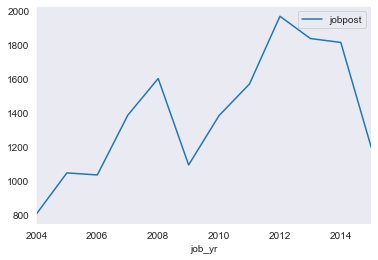

In [7]:
#plot of number of jobpost per year
df_jobs.pivot_table(index='job_yr',values='jobpost',aggfunc ='count').plot()

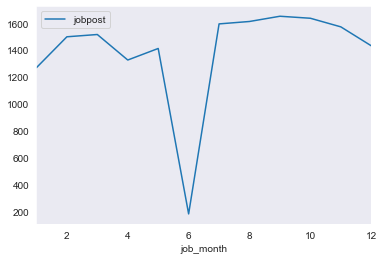

In [8]:
#plot of number of jobpost per month
df_jobs.pivot_table(index='job_month',values='jobpost',aggfunc ='count').plot()

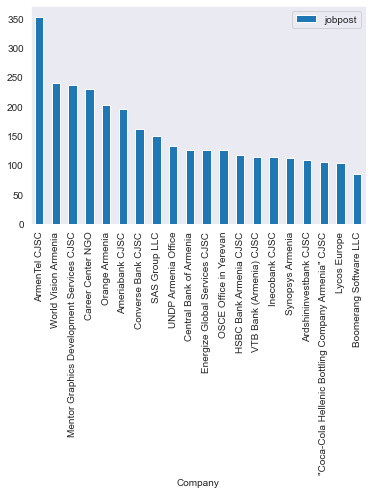

In [9]:
#Number of Job Post by top ten companies
df_jobs.pivot_table(index='Company',values='jobpost',aggfunc ='count').sort_values(by='jobpost',ascending = False).head(20).plot(kind ='bar')

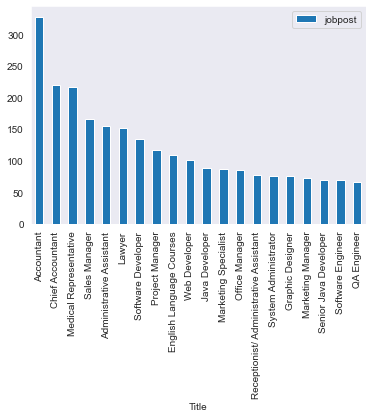

In [10]:
#Top 10 job title
df_jobs.pivot_table(index='Title',values='jobpost',aggfunc ='count').sort_values(by='jobpost',ascending = False).head(20).plot(kind ='bar')

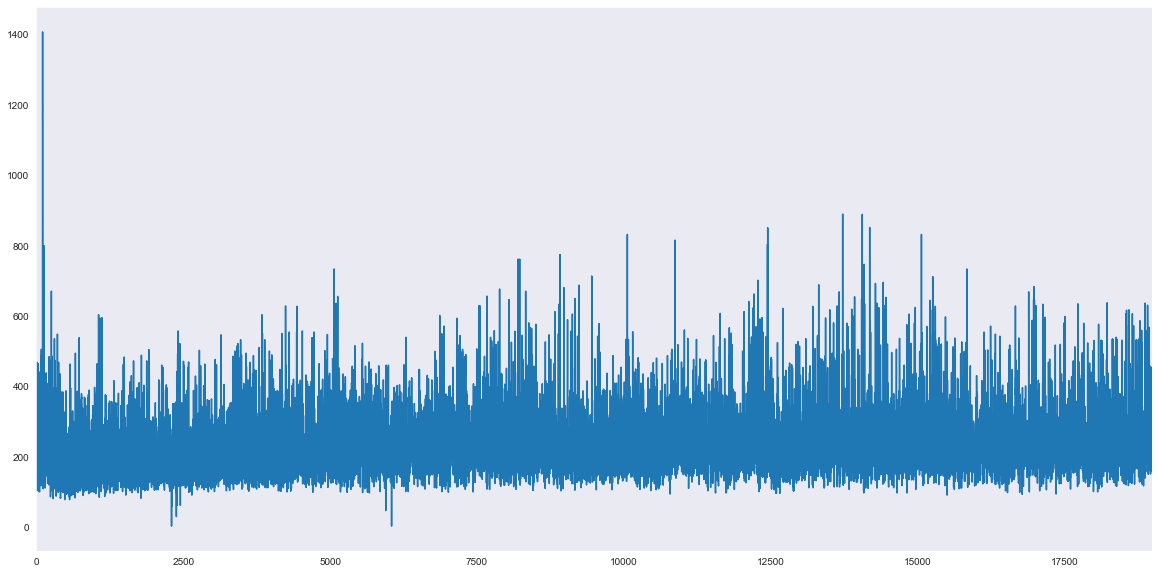

In [11]:
#Job Length in Jobpost
plt.figure(figsize=(20,10))
df_jobs['jobpost'].apply(lambda x: len(set(str(x).split()))).plot()

In [12]:
# Remove duplicate jobs based on jobpost and title
df_jobs.drop_duplicates(subset =['jobpost','Title'], 
                     keep = False,inplace = True) 

In [13]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18819 entries, 0 to 19000
Data columns (total 27 columns):
jobpost             18819 non-null object
date                18819 non-null object
Title               18793 non-null object
Company             18814 non-null object
AnnouncementCode    1200 non-null object
Term                7634 non-null object
Eligibility         4841 non-null object
Audience            627 non-null object
StartDate           9607 non-null object
Duration            10726 non-null object
Location            18789 non-null object
JobDescription      15009 non-null object
JobRequirment       16379 non-null object
RequiredQual        18399 non-null object
Salary              9558 non-null object
ApplicationP        18770 non-null object
OpeningDate         18177 non-null object
Deadline            18765 non-null object
Notes               2135 non-null object
AboutC              12320 non-null object
Attach              1506 non-null object
Year              

In [14]:
df_jobs

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Deadline,Notes,AboutC,Attach,Year,Month,IT,n_date,job_yr,job_month
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,26 January 2004,NaN,NaN,NaN,2004,1,False,2004-01-05,2004.0,1.0
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False,2004-01-07,2004.0,1.0
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False,2004-01-07,2004.0,1.0
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False,2004-01-07,2004.0,1.0
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True,2004-01-10,2004.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\n\n\nTITLE: Senior Crea...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False,2015-12-28,2015.0,12.0
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,20 January 2016,NaN,NaN,NaN,2015,12,False,2015-12-30,2015.0,12.0
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,20 January 2016,NaN,NaN,NaN,2015,12,False,2015-12-30,2015.0,12.0
18999,San Lazzaro LLC\n\n\nTITLE: Head of Online ...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False,2015-12-30,2015.0,12.0


In [15]:
#Remove jobs where description and requirment & jobpost is NA
df_jobs_new=df_jobs.loc[(df_jobs['JobDescription'].isna() == False) & (df_jobs['jobpost'].isna() == False) & (df_jobs['JobRequirment'].isna() == False)]

In [16]:
df_jobs_new['IT']=np.where(df_jobs_new.IT == True , 1,0)

In [17]:
df_jobs_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13064 entries, 0 to 19000
Data columns (total 27 columns):
jobpost             13064 non-null object
date                13064 non-null object
Title               13046 non-null object
Company             13064 non-null object
AnnouncementCode    847 non-null object
Term                5937 non-null object
Eligibility         3217 non-null object
Audience            404 non-null object
StartDate           6943 non-null object
Duration            8045 non-null object
Location            13058 non-null object
JobDescription      13064 non-null object
JobRequirment       13064 non-null object
RequiredQual        13060 non-null object
Salary              7144 non-null object
ApplicationP        13064 non-null object
OpeningDate         12765 non-null object
Deadline            13052 non-null object
Notes               1504 non-null object
AboutC              8964 non-null object
Attach              851 non-null object
Year                13

In [18]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [19]:
stop = list(nltk.corpus.stopwords.words('english'))
newStopWords = ['armenian','armenia','job','title','position',
                'location','responsibilities','application',
                'procedures','deadline','required','qualifications',
                'renumeration','salary','date','company','llc']
stop.extend(newStopWords)


In [20]:
import string
def pre_process(text):
    text = text.str.replace('\n','')                           #Replacing the / with none
    #text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text)      #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    #text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    #text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    #text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

### Supervised Classfication of IT jobs using JobDescription as text corpus and label as IT

In [20]:
# define X and y
X = df_jobs_new.JobDescription
y = df_jobs_new.IT

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9859,)
(3287,)
(9859,)
(3287,)


In [21]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [22]:
X_train

11767    as an organization built on strong ideas and s...
13431    redinet cjsc is seeking a qualified power engi...
11797    haypost cjsc is seeking an educated person for...
4234     hsbc bank armenia is looking to hire highly qu...
11684    aragast web technologies is seeking a senior m...
                               ...                        
16200    the incumbent will be responsible for ensuring...
1673     the position performs duties and activities to...
8375     the candidate will be responsible for implemen...
17737    mary kay armenia is looking for a sales develo...
414      research and collection of informaton on viola...
Name: JobDescription, Length: 9859, dtype: object

In [23]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

In [24]:
# get the tf-idf table 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
X_train_tfidf=vectorizer.fit_transform(X_train)

In [25]:
dtm1=pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names())

In [26]:
dtm1

,activity,application,business,candidate,cjsc,company,department,design,developer,development,...,senior,service,software,specialist,supervision,support,team,work,working,yerevan
0,0.000000,0.0,0.5348,0.432210,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.446073,0.000000,0.000000,0.0,0.0
1,0.000000,0.0,0.0000,0.245506,0.280492,0.307478,0.309245,0.601561,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.225266,0.0,0.0
2,0.000000,0.0,0.0000,0.000000,0.468230,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.420668,0.000000,0.46183,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.536296,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.43616,0.339319,...,0.448089,0.000000,0.431273,0.00000,0.0,0.000000,0.365727,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0
9855,0.759274,0.0,0.0000,0.000000,0.000000,0.000000,0.459160,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0
9856,0.000000,0.0,0.0000,0.357441,0.000000,0.000000,0.000000,0.000000,0.00000,0.326047,...,0.000000,0.000000,0.000000,0.00000,0.0,0.368906,0.000000,0.000000,0.0,0.0
9857,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.161983,0.154307,0.000000,0.0,0.0


In [27]:
X_test_tfidf = vectorizer.transform(X_test)

In [28]:
#!pip install imblearn
ros = RandomOverSampler(random_state=123)

X_train_tfidf_os, y_train_tfidf_os = ros.fit_sample(X_train_tfidf, y_train)

unique_elements, counts_elements = np.unique(y_train_tfidf_os, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [7767 7767]]


In [29]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    return metrics.accuracy_score(classifier.predict(feature_vector_train), label), metrics.accuracy_score(predictions, valid_y),metrics.roc_auc_score(predictions, valid_y )

### On Imbalanced Data

In [30]:
#Naive Bayes
# Naive Bayes on TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1)

#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(SVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)

#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)

NB  for L1, Count Vectors:  (0.8816309970585252, 0.8758746577426224, 0.8844197973084752)
SVC  for L1, Count Vectors:  (0.9257531189775839, 0.9062975357468817, 0.9039620038390348)
LR  for L1, Count Vectors:  (0.8944111978902526, 0.8865226650441131, 0.8854946993645624)


### On Balanced data

In [31]:
#Naive Bayes
# Naive Bayes on TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf_os, y_train_tfidf_os, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1)

#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(SVC(), X_train_tfidf_os, y_train_tfidf_os, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)

#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf_os, y_train_tfidf_os, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)

NB  for L1, Count Vectors:  (0.8068108664864169, 0.8153331305141467, 0.7395128951529211)
SVC  for L1, Count Vectors:  (0.9068494914381358, 0.894128384545178, 0.8414039082896613)
LR  for L1, Count Vectors:  (0.8190421011973735, 0.8506236689990874, 0.7784140223899261)


### Supervised Classfication of IT jobs using Jobpost as text corpus and label as IT

In [32]:
# define X and y
X = df_jobs_new.jobpost
y = df_jobs_new.IT

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9859,)
(3287,)
(9859,)
(3287,)


In [33]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [34]:
X_train

11767    danapharm llc\ntitle human resources executive...
13431    redinet cjsc\ntitle power engineer of design d...
11797    haypost cjsc\ntitle postal financial service s...
4234     hsbc bank armenia cjsc\ntitle software develop...
11684    aragast web technologies\ntitle senior aspnet ...
                               ...                        
16200    orange armenia cjsc\ntitle transmission engine...
1673     armenian technology group foundation atgf\ntit...
8375     sme development national center of armenia\nti...
17737    mary kay armenia cjsc\ntitle sales development...
414      womens rights center\ntitle website moderator\...
Name: jobpost, Length: 9859, dtype: object

In [35]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

In [36]:
# get the tf-idf table 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words=stop)
X_train_tfidf=vectorizer.fit_transform(X_train)

In [37]:
dtm1=pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names())

In [38]:
dtm1

,ability,ability work,accordance,according,account,accounting,accuracy,accurate,act,action,...,writing,written,written communication,written spoken,year,year experience,year professional,year relevant,year work,yerevan armeniajob
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.034796,0.000000,0.000000,0.0,0.000000,0.027553
1,0.078314,0.054539,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.029503
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.069248,0.0,0.120804,0.000000,0.000000,0.000000,0.0,0.000000,0.033799
3,0.056805,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.043845,0.0,0.000000,0.027025,0.000000,0.000000,0.0,0.050875,0.021400
4,0.000000,0.000000,0.087573,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.067164,0.000000,0.000000,0.0,0.126435,0.026592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854,0.141631,0.000000,0.070286,0.0,0.000000,0.000000,0.076772,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.026953,0.050379,0.000000,0.0,0.000000,0.021343
9855,0.086441,0.080265,0.000000,0.0,0.214331,0.062531,0.000000,0.0,0.0,0.0,...,0.000000,0.044480,0.0,0.000000,0.027417,0.000000,0.078825,0.0,0.000000,0.021710
9856,0.000000,0.000000,0.000000,0.0,0.000000,0.088672,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.038878,0.000000,0.000000,0.0,0.073188,0.030786
9857,0.060171,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.046443,0.0,0.000000,0.028627,0.000000,0.000000,0.0,0.053889,0.022668


In [39]:
X_test_tfidf = vectorizer.transform(X_test)

In [40]:
#!pip install imblearn
ros = RandomOverSampler(random_state=123)

X_train_tfidf_os, y_train_tfidf_os = ros.fit_sample(X_train_tfidf, y_train)

unique_elements, counts_elements = np.unique(y_train_tfidf_os, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [7767 7767]]


### On Balanced Data

In [42]:
#Naive Bayes
# Naive Bayes on TF-IDF
accuracy_roc_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_roc_L1)

#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_roc_L1 = train_model(SVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_roc_L1)

#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_roc_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_roc_L1)

NB  for L1, Count Vectors:  (0.9140886499644995, 0.9056890781867964, 0.8600294520340208)
SVC  for L1, Count Vectors:  (0.9818440004057206, 0.9498022512929724, 0.9404996201614755)
LR  for L1, Count Vectors:  (0.9396490516279542, 0.9285062366899909, 0.9082964824060851)


### On Imbalanced Data

In [43]:
#Naive Bayes
# Naive Bayes on TF-IDF
accuracy_roc_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf_os, y_train_tfidf_os, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_roc_L1)

#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_roc_L1 = train_model(SVC(), X_train_tfidf_os, y_train_tfidf_os, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_roc_L1)

#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_roc_L1 = train_model(LogisticRegression(), X_train_tfidf_os, y_train_tfidf_os, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_roc_L1)

NB  for L1, Count Vectors:  (0.9003476245654692, 0.8977791299056891, 0.8395364465669594)
SVC  for L1, Count Vectors:  (0.9919531350585812, 0.9510191664131427, 0.9265178022511822)
LR  for L1, Count Vectors:  (0.9392944508819364, 0.9215089747490113, 0.8726504689461635)


In [109]:
df_jobs_new['jobpost']

0        AMERIA Investment Consulting Company\nJOB TITL...
2        Caucasus Environmental NGO Network (CENN)\nJOB...
3        Manoff Group\nJOB TITLE:  BCC Specialist\nPOSI...
13       Food Security Regional Cooperation and Stabili...
17       United Nations Development Programme, Armenia\...
                               ...                        
18992                                       IT_Development
18995    "Transport PIU" State Institution of the RA Mi...
18996                                       IT_Development
18999    San Lazzaro   LLC\n\n\nTITLE:  Head of Online ...
19000    "Kamurj" UCO CJSC\n\n\nTITLE:  Lawyer in Legal...
Name: jobpost, Length: 13146, dtype: object

### Job desired characteristics and skills and the way they are changing over the period.
#### KMeans Unsupervised along with topic modelling has been used for this 

In [58]:
text=df_jobs_new['JobRequirment'].str.cat(df_jobs_new['Title'], sep =" ") 
text=text.astype(str)
text = text.apply(lambda x: clean_text(x))
text=pre_process(text)

In [59]:
# get the tf-idf table 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 1), 
                             stop_words=stop)
vectorizer.fit(text)

TfidfVectorizer(max_df=0.95, min_df=0.05,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [60]:
# Create a training data
X_train= vectorizer.transform(text)

In [61]:
X_train

<13064x193 sparse matrix of type '<class 'numpy.float64'>'
	with 271301 stored elements in Compressed Sparse Row format>

In [62]:
# train a LDA Model

from sklearn import decomposition

lda_model = decomposition.LatentDirichletAllocation(n_components=7, learning_method='online', max_iter=50)
X_topics = lda_model.fit_transform(X_train)
topic_word = lda_model.components_ 
vocab = vectorizer.get_feature_names()

In [63]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['office legal administrative document provide meeting assistant duty perform prepare',
 'project financial report ensure prepare activity accounting program management implementation',
 'web system network responsible equipment database maintenance technical support software',
 'marketing market sale product research develop strategy plan business implement',
 'test testing case build design engineer perform software result create',
 'software design developer team code development technical develop work participate',
 'customer sale client service product responsible manager provide order account']

In [64]:
#Apply TfidfVectorizer to review text
from sklearn.cluster import KMeans
from sklearn import metrics

In [65]:
# calculate SC for K=3 through K=12
k_range = range(2, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(X_train)
    scores.append(metrics.silhouette_score(X_train, km.labels_))

In [66]:
scores

[0.03656969331920314,
 0.03720240536519476,
 0.03529762042667701,
 0.03781992361588255,
 0.03776005585267504,
 0.04130130424710761,
 0.044827229505584966,
 0.04465663533724406,
 0.0477078530747166,
 0.04939356744223317]

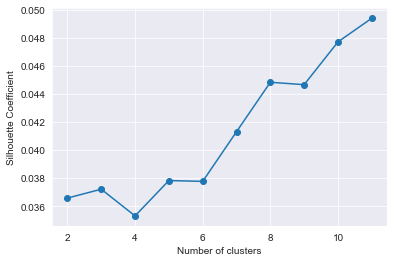

In [67]:
# plot the results
plt.plot(k_range, scores,'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [68]:
cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_train )
    cluster_errors.append( clusters.inertia_ )

In [69]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

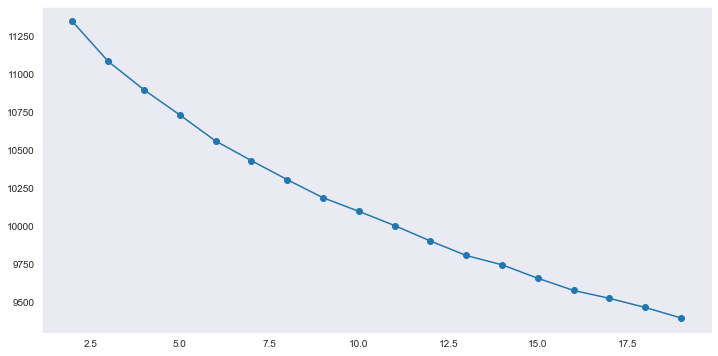

In [70]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [71]:
km_4=KMeans(n_clusters=4,random_state=123).fit(X_train)
km_5=KMeans(n_clusters=5,random_state=123).fit(X_train)
km_6=KMeans(n_clusters=6,random_state=123).fit(X_train)
km_7=KMeans(n_clusters=7,random_state=123).fit(X_train)
km_8=KMeans(n_clusters=8,random_state=123).fit(X_train)
km_9=KMeans(n_clusters=9,random_state=123).fit(X_train)

In [72]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

0    0.461421
3    0.210043
2    0.170928
1    0.157609
dtype: float64

In [73]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

3    0.542636
2    0.169167
4    0.156384
1    0.090095
0    0.041718
dtype: float64

In [74]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

3    0.521663
2    0.168096
5    0.104562
1    0.087952
4    0.076010
0    0.041718
dtype: float64

In [75]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())

0    0.380588
2    0.164574
3    0.153705
5    0.100735
1    0.084430
4    0.074556
6    0.041412
dtype: float64

In [76]:
pd.Series(km_8.labels_).value_counts()/sum(pd.Series(km_8.labels_).value_counts())

1    0.390922
4    0.163579
5    0.116503
2    0.100505
6    0.085426
3    0.074403
0    0.041412
7    0.027250
dtype: float64

In [77]:
pd.Series(km_9.labels_).value_counts()/sum(pd.Series(km_9.labels_).value_counts())

1    0.387018
5    0.114054
2    0.100505
8    0.095759
6    0.084813
4    0.079302
3    0.073484
0    0.037967
7    0.027097
dtype: float64

In [78]:
# we create a kmeans model
model = KMeans(n_clusters=8, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=5)

In [79]:
# apply the model on this prepared data
res = model.fit(X_train)
res

KMeans(max_iter=100, n_init=1, random_state=5)

In [80]:
cluster_centers = np.array(res.cluster_centers_)

In [81]:
# sorting the cluster centers
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

In [82]:
# Getting the vocalbulary as well as cluster centers
# Firstly, set of words from the tf-idf itself
vocab = vectorizer.get_feature_names()
vocab = np.array(vocab)

In [83]:
# get top 10 words from that cluster
words=set()
for i in range(len(res.cluster_centers_)):
    words = set(vocab[sorted_vals[i][-10:]])
    print(words)

{'market', 'plan', 'research', 'activity', 'sale', 'manager', 'product', 'develop', 'strategy', 'marketing'}
{'developer', 'test', 'develop', 'development', 'work', 'software', 'code', 'team', 'technical', 'design'}
{'service', 'sale', 'customer', 'manager', 'client', 'product', 'provide', 'new', 'responsible', 'ensure'}
{'control', 'activity', 'organize', 'work', 'report', 'financial', 'management', 'process', 'prepare', 'ensure'}
{'draft', 'act', 'issue', 'regulation', 'contract', 'client', 'document', 'provide', 'prepare', 'legal'}
{'support', 'program', 'project', 'activity', 'implementation', 'development', 'work', 'team', 'provide', 'ensure'}
{'assist', 'office', 'accounting', 'call', 'duty', 'assistant', 'administrative', 'document', 'maintain', 'perform'}
{'responsible', 'support', 'network', 'system', 'database', 'web', 'equipment', 'develop', 'technical', 'design'}


In [84]:
# how many observations are in each cluster

df_jobs_new['cluster'] = model.labels_

In [85]:
df_jobs_new.cluster.loc[df_jobs_new['cluster'] == 0 ] = 'Public_Relation'

In [86]:
df_jobs_new.cluster.loc[df_jobs_new['cluster'] == 1 ] = 'Finance_Accounting'

In [87]:
df_jobs_new.cluster.loc[df_jobs_new['cluster'] == 2 ] = 'Others'

In [88]:
df_jobs_new.cluster.loc[df_jobs_new['cluster'] == 3 ] = 'IT_Development'

In [89]:
df_jobs_new.cluster.loc[df_jobs_new['cluster'] == 4 ] = 'IT_Operations'

In [90]:
df_jobs_new.cluster.loc[df_jobs_new['cluster'] == 5 ] = 'Marketing_Sales'

In [91]:
df_jobs_new.cluster.loc[df_jobs_new['cluster'] == 6 ] = 'Project_Management'

In [92]:
df_jobs_new.cluster.loc[df_jobs_new['cluster'] == 7 ] = 'IT_QualityControl'

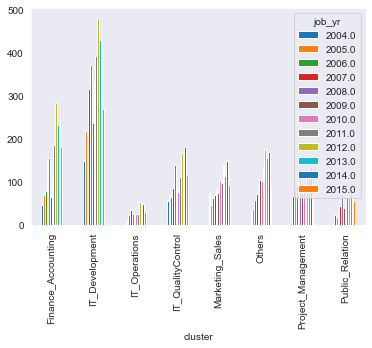

In [93]:
#Job requirements and skills plot over the period of time from 2004-2015
df_jobs_new.pivot_table(index='cluster',columns='job_yr',values='jobpost',aggfunc ='count').plot.bar().figsize=(10,10)
plt.show()

### Dividing the Jobposts into 3 sets based on year value and checking the variation with time

In [368]:
df_jobs_new['period']=np.where(((df_jobs_new.job_yr >=2004) & (df_jobs_new.job_yr <=2007) ),'2004-2007',np.where(((df_jobs_new.job_yr >=2008) & (df_jobs_new.job_yr <=2011) ),'2008-2011','2012-2015'))

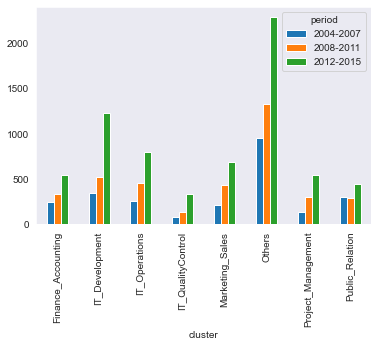

In [369]:
#Number of Job Post by top ten companies
df_jobs_new.pivot_table(index='cluster',columns='period',values='jobpost',aggfunc ='count').plot.bar().figsize=(10,10)
plt.show()

### Job Similarity
#### Based on the average cosine similarity values of 4 columns ['JobRequirment','Title','JobDescription','RequiredQual'], top five similar jobs are predicted

In [21]:
df_simi=df_jobs_new[['JobRequirment','Title','JobDescription','RequiredQual']]

In [22]:
for c in df_simi.columns:
    text=df_simi[c].astype('str')
    text = text.apply(lambda x: clean_text(x))
    text=pre_process(text)
    df_simi[c]=text

In [23]:
df_simi.reset_index(drop= True,inplace = True)

In [24]:
# get the tf-idf table 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 1), 
                             stop_words=stop)
vectorizer.fit(df_simi['JobRequirment'])

TfidfVectorizer(max_df=0.95, min_df=0.05,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [25]:
# Create a training data
X_JobRequirment= vectorizer.transform(df_simi['JobRequirment'])

In [26]:
vectorizer.fit(df_simi['Title'])
X_Title=vectorizer.transform(df_simi['Title'])

In [27]:
vectorizer.fit(df_simi['JobDescription'])
X_JobDescription=vectorizer.transform(df_simi['JobDescription'])

In [28]:
vectorizer.fit(df_simi['RequiredQual'])
X_RequiredQual=vectorizer.transform(df_simi['RequiredQual'])

In [29]:
X_Title

<13064x7 sparse matrix of type '<class 'numpy.float64'>'
	with 8773 stored elements in Compressed Sparse Row format>

In [127]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(X_JobRequirment, X_JobRequirment))

[[1.         0.02223309 0.12339593 ... 0.11402816 0.         0.17129976]
 [0.02223309 1.         0.08563246 ... 0.03330403 0.         0.17867249]
 [0.12339593 0.08563246 1.         ... 0.15047486 0.04053258 0.14148526]
 ...
 [0.11402816 0.03330403 0.15047486 ... 1.         0.05931739 0.        ]
 [0.         0.         0.04053258 ... 0.05931739 1.         0.05668326]
 [0.17129976 0.17867249 0.14148526 ... 0.         0.05668326 1.        ]]


In [30]:
cos_simi_tit=(X_Title*X_Title.T).A
cos_simi_req=(X_JobRequirment*X_JobRequirment.T).A


In [31]:
cos_simi_jobd=(X_JobDescription*X_JobDescription.T).A
cos_simi_req=(X_RequiredQual*X_RequiredQual.T).A

In [32]:
cos_simi=0.25*(cos_simi_tit+cos_simi_req+cos_simi_jobd+cos_simi_req)

In [201]:
cos_simi

0.0

In [40]:
np.fill_diagonal(cos_simi,np.nan)

In [49]:
#Checking for similarity
inp_doc=df_simi['Title'][50]

In [50]:
inp_idx=list(df_simi['Title']).index(inp_doc)


In [51]:
cos_simi[inp_idx]

array([0.06459028, 0.07283573, 0.06575626, ..., 0.0856445 , 0.12088827,
       0.14435698])

In [52]:
related_docs_indices=cos_simi[inp_idx].argsort()[:-6:-1]

In [56]:
#Similar 5 jobs 
df_simi.iloc[related_docs_indices]

,JobRequirment,Title,JobDescription,RequiredQual
50,drawing work engineering maintenancedepartment,autocad operator,yerevan brandy seeking qualifiedcandidates fil...,higher technical education qualification engin...
49,coordinating technical investment project elab...,technical project manager,yerevan brandy seeking qualifiedcandidates fil...,technical education qualification engineermech...
887,repair audio video home appliance,technician,seeking technician service centre,higher technical education relevant work exper...
2558,develop implement company efficient commercial...,commercial director,step logic seeking candidate ofcommercial dire...,higher education economics technical aspect wo...
821,sell product provide consulting customer,salesperson consultant,seeking salesperson consultant fashionstore,higher education excellent knowledge russian l...
